In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
import geopandas
import geopy
import pandas
import shapely.geometry

In [2]:
# Load the data sets
mad = geopandas.read_file("City_Limit.zip").to_crs("epsg:32616")
water = geopandas.read_file("Lakes_and_Rivers.zip").to_crs(mad.crs)
fire = geopandas.read_file("Fire_Stations.geojson").to_crs(mad.crs)
print("DONE")

DONE


In [3]:
# Find the location of the CS building
cs_gps = geopandas.tools.geocode("1210 W Dayton St, Madison, WI 53706, United States", provider="nominatim", user_agent="cs320")
cs = cs_gps.to_crs(mad.crs)
cs

,geometry,address
0,POINT (304057.130 4771572.575),"Computer Sciences and Statistics, 1210, West D..."


<Axes: >

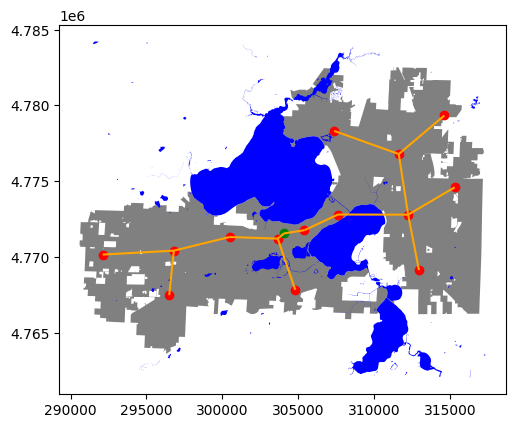

In [4]:
# Find the minimum spanning tree rooted at the CS building to all fire stations
locations = pandas.concat([cs, fire], ignore_index = True)["geometry"]
n = len(locations)
distances = [[0 for x in range(n)] for y in range(n)]
for i in range(n):
    for j in range(n):
        distances[i][j] = locations[i].distance(locations[j])
visited = [0]
unvisited = [x for x in range(1, n)]
count = 0
edges = []
while unvisited and count < 100:
    count = count + 1
    a = visited[0]
    b = unvisited[0]
    d = distances[visited[0]][unvisited[0]]
    for i in visited:
        for j in unvisited:
            if distances[i][j] < d:
                a = i
                b = j
                d = distances[i][j]
    unvisited.remove(b)
    visited.append(b)
    edges.append([a, b])
edge_list = []
for e in edges:
    edge_list.append(shapely.geometry.LineString([locations[e[0]], locations[e[1]]]))
lines = geopandas.GeoDataFrame(geometry = edge_list, crs = mad.crs)
ax = mad.plot(color = "grey")
water.plot(color = "blue", ax = ax)
fire.plot(color = "red", ax = ax)
cs.plot(color = "green", ax = ax)
lines.plot(color = "orange", ax = ax)